## Classifying Nation for the Wine Data

Please review the following site for information on our dataset of interest here: https://www.kaggle.com/datasets/dev7halo/wine-informationLinks to an external site.

### Your goals are:

- to use the other variables in the dataset to predict price (i.e. recover your model architecture and results from last week),
- to use the other variables in the dataset to predict (classify) nation.

### Assignment Specs

- You're going to (re-)implement the neural networks you built for the practice activity last week using Keras. For each of the different networks, please do the following:
    - Print either a summary of the model (architecture) or a model plot (so that we can see the details of the network architecture)
    - Print the values of the relevant model performance metrics (feel free to use a single train-test split for evaluation)
- A secondary goal of this assignment is to explore some of the other options and nuances of Keras functions.
    - You should explore at least 3 different sets of settings for function inputs which you did not explore last week either because you chose not to or didn't have access to them with the previous neural network implementation. Comment on what you discover about these inputs and how the behave.
    - I also want you to explore the different types of outputs you can obtain from these models. Please report at least 3 different model performance metrics, and create a confusion matrix of your results for each of your neural network models (construction of a confusion matrix may involve other libraries such as pandas or numpy or scikit learn).
- Be sure not to use any of the variables that explicitly correspond to nation, as explanatory variables.
- Your submission should be built and written with non-experts as the target audience. All of your code should still be included, but do your best to narrate your work in accessible ways.

## Import Data

In [2]:
import pandas as pd
import numpy as np

wine = pd.read_csv("/Users/dan/calpoly/BusinessAnalytics/GSB545ADML/Week6/cleansingWine.csv")
wine.head()

/var/folders/jl/kkh608tn0k194f6cv0bwbqp80000gn/T/ipykernel_19837/2738000162.py:4: DtypeWarning: Columns (8,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  wine = pd.read_csv("/Users/dan/calpoly/BusinessAnalytics/GSB545ADML/Week6/cleansingWine.csv")


,Unnamed: 0,id,name,producer,nation,local1,local2,local3,local4,varieties1,...,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
0,0,137197,Altair,Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,...,Table,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000,2014,750
1,1,137198,"Altair, Sideral",Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,...,Table,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000,2016,750
2,2,137199,Baron du Val Red,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,...,Table,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,0,0,750
3,3,137200,Baron du Val White,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,...,Table,11~12,9~11,SWEET1,ACIDITY3,BODY2,TANNIN1,0,0,750
4,4,137201,"Benziger, Cabernet Sauvignon",Benziger,USA,California,NaN,NaN,NaN,Cabernet Sauvignon,...,Table,13~14,17~19,SWEET1,ACIDITY3,BODY3,TANNIN4,0,2003,750


## Preprocessing

In [3]:
wine_clean = wine.copy()
# Remove wine prices that are zero or greater than 100k

# Remove columns with lots of NaNs
# Define a threshold and drop columns with more than 50% missing
threshold = 0.47
missing_fraction = wine_clean.isnull().mean()
columns_to_drop = missing_fraction[missing_fraction > threshold].index
wine_clean.drop(columns=columns_to_drop, inplace=True)

# Drop Remaining Nans
wine_clean.dropna(inplace=True)
wine_clean.head()

,Unnamed: 0,id,name,producer,nation,local1,varieties1,type,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
0,0,137197,Altair,Altair,Chile,Rapel Valley,Cabernet Sauvignon,Red,Table,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000,2014,750
1,1,137198,"Altair, Sideral",Altair,Chile,Rapel Valley,Cabernet Sauvignon,Red,Table,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000,2016,750
4,4,137201,"Benziger, Cabernet Sauvignon",Benziger,USA,California,Cabernet Sauvignon,Red,Table,13~14,17~19,SWEET1,ACIDITY3,BODY3,TANNIN4,0,2003,750
5,5,137202,"Calvet, Beaujolais Villages",Calvet,France,Bourgogne,Gamay,Red,Table,12,13~15,SWEET2,ACIDITY4,BODY2,TANNIN2,0,2007,750
6,6,137203,"Calvet, Aetos",Calvet,France,Bordeaux,Merlot,Red,Table,13,17~19,SWEET1,ACIDITY3,BODY4,TANNIN3,0,2003,750


## Predict Price - Regression
### Model Setup

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Price as predictor
X = wine_clean.drop(columns=["price"])
y = wine_clean["price"]

# Satisfy categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.metrics import mean_squared_error, r2_score

# Construct the model using Functional API
inputs = keras.Input(shape=(X_train_scaled.shape[1],))  # input layer
x = layers.Dense(64, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001))(inputs)  # hidden layer
outputs = layers.Dense(1)(x)  # output layer for regression

model = keras.Model(inputs=inputs, outputs=outputs, name="regression_model")

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='mse',
    metrics=['mae']  # optional: mean absolute error for visibility
)

# Train the model
history = model.fit(
    X_train_scaled,
    y_train,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
    ],
    verbose=1
)

# Evaluate the model
scores = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"MSE): {scores[0]}")
print(f"MAE: {scores[1]}")

# Predict and calculate R² separately
y_pred = model.predict(X_test_scaled).flatten()
print("R²:", r2_score(y_test, y_pred))


Epoch 1/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 57907859456.0000 - mae: 83207.5938 - val_loss: 36300099584.0000 - val_mae: 78568.7344
Epoch 2/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 49566826496.0000 - mae: 78757.2266 - val_loss: 36299595776.0000 - val_mae: 78567.5781
Epoch 3/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 42878210048.0000 - mae: 79977.2656 - val_loss: 36299198464.0000 - val_mae: 78566.6719
Epoch 4/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 51896733696.0000 - mae: 79552.5234 - val_loss: 36298833920.0000 - val_mae: 78566.0781
Epoch 5/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 41246101504.0000 - mae: 78138.1797 - val_loss: 36298506240.0000 - val_mae: 78565.5625
Epoch 6/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 67432067072.0000 - mae: 85239.7734 - val_loss: 36298170368.0000 - val_mae: 78565.0625
Epoch 7/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 50608889856.0000 - mae: 81651.6797 - val_loss: 362

Here we see we are getting similar results to our neural network using sci_kit learn. Lets now try to use more layers to hopefully improve our metrics.

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.metrics import mean_squared_error, r2_score

# Construct the model
inputs = keras.Input(shape=(X_train_scaled.shape[1],))  # Adjusts automatically to your features

x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(inputs)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)

outputs = layers.Dense(1)(x)  # Regression output (no activation for continuous values)

model = keras.Model(inputs=inputs, outputs=outputs, name="complex_regression_model")

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='mse',
    metrics=['mae']
)

# Train the model
history = model.fit(
    X_train_scaled,
    y_train,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    ],
    verbose=1
)

# Evaluate
scores = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"MSE: {scores[0]}")
print(f"MAE: {scores[1]}")

# Predict and compute R²
y_pred = model.predict(X_test_scaled).flatten()
print("R²:", r2_score(y_test, y_pred))


Epoch 1/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - loss: 53706768384.0000 - mae: 82236.8984 - val_loss: 33083594752.0000 - val_mae: 73271.0156
Epoch 2/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - loss: 26165583872.0000 - mae: 67623.9922 - val_loss: 28651012096.0000 - val_mae: 69574.2031
Epoch 3/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - loss: 33638658048.0000 - mae: 56533.2461 - val_loss: 25144920064.0000 - val_mae: 71916.8672
Epoch 4/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - loss: 26081896448.0000 - mae: 47299.2148 - val_loss: 25129207808.0000 - val_mae: 86387.0000
Epoch 5/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - loss: 15703430144.0000 - mae: 34853.8672 - val_loss: 37105360896.0000 - val_mae: 135016.3125
Epoch 6/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 15s 110ms/step - loss: 13197949952.0000 - mae: 29799.4648 - val_loss: 150423011328.0000 - val_mae: 349340.2812
Epoch 7/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - loss: 18054916096.0000 - mae: 44909.0039 - va

Here we are still getting a similar faulty score, which we concluded was a byproduct from wide range of prices last time.

## Predict Producer - Categorical

### Model Setup

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# Prepare the data
wine_clean2 = wine_clean.drop(columns=["id", "name", "nation"])

# STEP 1: Keep only top N producers to help model make better predictions
top_n = 30
top_producers = wine_clean2["producer"].value_counts().nlargest(top_n).index
filtered_df = wine_clean2[wine_clean2["producer"].isin(top_producers)].copy()

# STEP 2: Redefine X and y from filtered data
X = filtered_df.drop(columns=["producer", "id", "name", "nation"], errors='ignore')
y = filtered_df["producer"]

# STEP 3: One-hot encode features
X_encoded = pd.get_dummies(X, drop_first=True)

# STEP 4: Label encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# STEP 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# STEP 6: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


To help the model learn rare classes by balancing weights

In [24]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(enumerate(class_weights))


### Model

- Made sure to only use important categories.
- Set up a class weight system to allow model to know which classes are more rare.
- Changed teh complexity to a 64 -> 32 -> 16.

In [29]:
# Number of classes
num_classes = len(label_encoder.classes_)

# Build the Keras model using functional API
inputs = keras.Input(shape=(X_train_scaled.shape[1],))
x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))(inputs)
x = layers.Dropout(0.3)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)  # for mutually exclusive classes

model = keras.Model(inputs=inputs, outputs=outputs, name="wine_classifier")

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',  # ✅ use sparse version with integer labels
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train_scaled,
    y_train,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    ],
    verbose=1,
    class_weight=class_weight_dict  # ✅ Add this
)

# Evaluate on test data
scores = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test Loss: {scores[0]}")
print(f"Test Accuracy: {scores[1]}")

# Predict and print classification report
y_pred_probs = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Get the unique labels actually present in y_test and y_pred
unique_labels = np.unique(np.concatenate([y_test, y_pred_classes]))

# Print classification report only for those labels
print(classification_report(
    y_test,
    y_pred_classes,
    labels=unique_labels,
    target_names=label_encoder.inverse_transform(unique_labels)
))


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.0149 - loss: 3.7356 - val_accuracy: 0.0426 - val_loss: 3.5029
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0295 - loss: 3.5671 - val_accuracy: 0.0372 - val_loss: 3.4650
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0556 - loss: 3.4914 - val_accuracy: 0.0372 - val_loss: 3.4410
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0709 - loss: 3.4679 - val_accuracy: 0.0585 - val_loss: 3.4233
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0611 - loss: 3.4348 - val_accuracy: 0.0691 - val_loss: 3.4058
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0676 - loss: 3.3663 - val_accuracy: 0.0851 - val_loss: 3.3857
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0913 - loss: 3.3836 - val_accuracy: 0.1064 - val_loss: 3.3641
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0724 - loss: 3.3689 - val_accuracy: 0.1117 - 

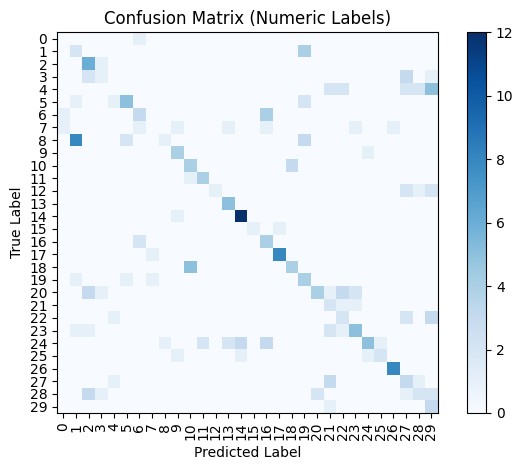


Numeric Label Mapping:
0: Barons de Rothschild Domaines Barons de Rothschild
1: Beringer Vineyards
2: Casas del Toqui
3: Concha y Toro
4: Cono Sur
5: Delicato Family Vineyards  DFV
6: Dourthe  Vins  Vignobles Dourthe
7: GCF  GCF Group
8: Gallo Family Vineyard  EJ Gallo Winery
9: Gerard Bertrand
10: Grant Burge
11: Hardys
12: Lapostolle Casa Lapostolle
13: Louis Jadot
14: M Chapoutier
15: MGM Mondo del Vino
16: Maison Ginestet
17: Marchesi Antinori
18: Penfolds
19: Robert Mondavi
20: San Pedro
21: Santa Carolina
22: Santa Helena Vina Santa Helena
23: Santa Rita
24: Tesco Finest
25: Tesco Group Tesco Simply Wine
26: Trapiche
27: Ventisquero
28: Vina Montgras
29: Vinedos Errazuriz Ovalle SA


In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Create numeric labels for display
numeric_labels = list(range(len(unique_labels)))

# Map numeric labels back to actual class index for accuracy
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_classes,
    labels=unique_labels,
    display_labels=numeric_labels,  # ✅ show numbers instead of names
    xticks_rotation='vertical',
    cmap='Blues',
    include_values=False
)

plt.title("Confusion Matrix (Numeric Labels)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Optional: print numeric label mapping
label_map = dict(zip(numeric_labels, label_encoder.inverse_transform(unique_labels)))
print("\nNumeric Label Mapping:")
for i, name in label_map.items():
    print(f"{i}: {name}")



### Visualize learning curve

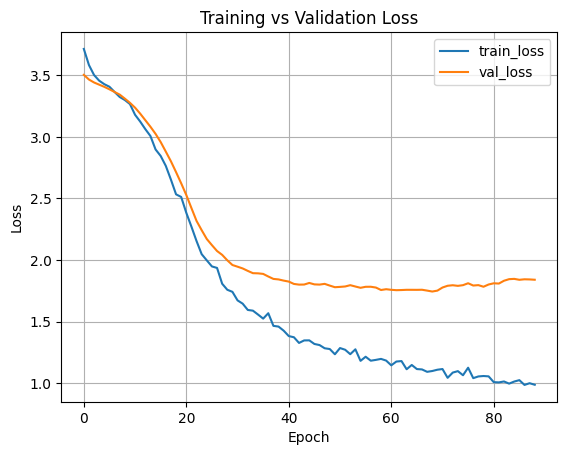

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

The model showed consistent improvement in training loss over time, indicating effective learning. Validation loss decreased significantly during the first 35–40 epochs but then plateaued, suggesting the model began to overfit. However, early stopping helped prevent further overfitting. Overall, the loss curves demonstrate strong learning performance with room for additional regularization or class balancing to further improve generalization.

## Other Karas options to explore:
1. **label_smoothing**
- Purpose: Helps the model avoid being overconfident when predicting classes, which can improve generalization.
- How it works: Instead of assigning full probability to the true class (e.g., 1.0), it distributes some probability to other classes (e.g., 0.9 to true class, 0.1 spread across others).
- When to use: Especially useful in multi-class classification with noisy labels or overlapping classes.
- Use:
```
loss = tf.keras.losses.SparseCategoricalCrossentropy(label_smoothing=0.1)
```

2. **Learning Rate Schedule (ExponentialDecay)**
- Purpose: Gradually lowers the learning rate as training progresses, allowing faster convergence early and finer adjustments later.
- Why it matters: A constant learning rate can overshoot the optimal point or get stuck. A decay schedule balances learning speed and stability.
- Use:
```
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=1000,
    decay_rate=0.96
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule) 
```

3. **kernel_initializer='he_uniform'**
- Purpose: Controls how the model initializes weights before training. Good initialization can improve training speed and performance.
- Why use 'he_uniform': It's designed for ReLU activations and helps prevent vanishing/exploding gradients.
- Use:
```
layers.Dense(64, activation='relu', kernel_initializer='he_uniform')
```

4. **Dropout Layers**
- Purpose: Randomly disables a portion of neurons during training to prevent overfitting.
- Effect: Forces the model to not rely too heavily on specific neurons, improving generalization
- Use:
```
layers.Dropout(0.3)
```

5. **BatchNormalization**
- Purpose: Normalizes layer outputs during training, which stabilizes learning and speeds up convergence.
- When useful: Deep models or models that struggle to converge consistently.
- Use:
```
layers.BatchNormalization()
```

6. **class_weight in model.fit()**
- Purpose: Addresses class imbalance by giving more weight to underrepresented classes.
- Why use: Prevents the model from being biased toward majority classes in classification.
- Use:
```
model.fit(..., class_weight={0: 1.5, 1: 0.5, ...})
```